In [107]:
import os
import pandas as pd
import numpy as np
import scipy
from scipy import linalg 
import matplotlib.pyplot as plt
plt.style.use('ggplot') 

In [108]:
# ucitavanje podataka 
os.chdir("C:\\Users\\Korisnik\\Desktop\\Numerical Linear Algebra")
data = pd.read_csv('global_health_nutrition_data.csv')
data = data[data['Indicator Code']== 'SP.POP.TOTL']

In [109]:
data #podaci koji imaju trazeni Indicator Code

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Unnamed: 60
267,Arab World,ARB,"Population, total",SP.POP.TOTL,9.254053e+07,9.507799e+07,9.771119e+07,1.004394e+08,1.032637e+08,1.061841e+08,...,3.287666e+08,3.368865e+08,3.450542e+08,3.531122e+08,3.610318e+08,3.688026e+08,3.765043e+08,3.842226e+08,3.920223e+08,NaN
612,Caribbean small states,CSS,"Population, total",SP.POP.TOTL,4.190810e+06,4.270928e+06,4.353408e+06,4.435830e+06,4.514432e+06,4.586896e+06,...,6.723587e+06,6.767278e+06,6.811213e+06,6.854569e+06,6.896697e+06,6.937108e+06,6.975754e+06,7.012857e+06,7.048966e+06,NaN
957,Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,9.140158e+07,9.223712e+07,9.301489e+07,9.384575e+07,9.472260e+07,9.544706e+07,...,1.055045e+08,1.051267e+08,1.049244e+08,1.045438e+08,1.041740e+08,1.039353e+08,1.037137e+08,1.034962e+08,1.033186e+08,NaN
1302,Early-demographic dividend,EAR,"Population, total",SP.POP.TOTL,9.800676e+08,1.003380e+09,1.027455e+09,1.052236e+09,1.077760e+09,1.104011e+09,...,2.774122e+09,2.817325e+09,2.860676e+09,2.904408e+09,2.948206e+09,2.991724e+09,3.035326e+09,3.079002e+09,3.122703e+09,NaN
1647,East Asia & Pacific,EAS,"Population, total",SP.POP.TOTL,1.042480e+09,1.045794e+09,1.059977e+09,1.085453e+09,1.110564e+09,1.136734e+09,...,2.160761e+09,2.175670e+09,2.190186e+09,2.204613e+09,2.219109e+09,2.233937e+09,2.248920e+09,2.264064e+09,2.279186e+09,NaN
1992,East Asia & Pacific (excluding high income),EAP,"Population, total",SP.POP.TOTL,8.964930e+08,8.957847e+08,9.073954e+08,9.302924e+08,9.528386e+08,9.764096e+08,...,1.923095e+09,1.936736e+09,1.950281e+09,1.963842e+09,1.977658e+09,1.991783e+09,2.006123e+09,2.020656e+09,2.035130e+09,NaN
2337,East Asia & Pacific (IDA & IBRD countries),TEA,"Population, total",SP.POP.TOTL,8.850532e+08,8.841033e+08,8.955075e+08,9.182103e+08,9.405390e+08,9.638443e+08,...,1.898935e+09,1.912445e+09,1.925863e+09,1.939296e+09,1.952982e+09,1.966975e+09,1.981183e+09,1.995584e+09,2.009929e+09,NaN
2682,Euro area,EMU,"Population, total",SP.POP.TOTL,2.653965e+08,2.678253e+08,2.703248e+08,2.728764e+08,2.753822e+08,2.778567e+08,...,3.326445e+08,3.342702e+08,3.353533e+08,3.361426e+08,3.369403e+08,3.361615e+08,3.387553e+08,3.386171e+08,3.394251e+08,NaN
3027,Europe & Central Asia,ECS,"Population, total",SP.POP.TOTL,6.675169e+08,6.752143e+08,6.831529e+08,6.911463e+08,6.990470e+08,7.066918e+08,...,8.784285e+08,8.819259e+08,8.855807e+08,8.890775e+08,8.928161e+08,8.950503e+08,9.008632e+08,9.039878e+08,9.079441e+08,NaN
3372,Europe & Central Asia (excluding high income),ECA,"Population, total",SP.POP.TOTL,2.752207e+08,2.794889e+08,2.837763e+08,2.880750e+08,2.923473e+08,2.965393e+08,...,3.942171e+08,3.952659e+08,3.970379e+08,3.991217e+08,4.014482e+08,4.038305e+08,4.064248e+08,4.089842e+08,4.113382e+08,NaN


In [110]:
arapske =['Algeria',
     'Bahrain',
     'Comoros', 
     'Djibouti',
     'Egypt, Arab Rep.',
     'Iraq', 
     'Jordan',
     'Kuwait',
     'Lebanon',
     'Libya',
      'Mauritania',
     'Morocco',
     'Oman',
     'Palestine',
     'Qatar',
     'Saudi Arabia', 
     'Somalia',
     'Sudan',
     'Syrian Arab Republic',
     'Tunisia',
     'United Arab Emirates',
     'Yemen, Rep.']

In [111]:
arab = []
for i in range(data.shape[0]):
    arab.append(data['Country Name'].values[i] in arapske) #lista od T ili F zavisno gde su arapske zemlje u podacima
data = data[arab] #podaci samo za arapske zemlje
data =data.reset_index()# samo da resetuje indeks da krece od 0

vrednosti = data.iloc[:,5:-1] # bez zadnje i prvih 5, jer nisu vrednosti po godinama
vrednosti = vrednosti.fillna(method ='ffill') 
godine = np.arange(1,vrednosti.shape[1]+1) # zbog indeksiranja od 0


In [112]:
vrednosti # podaci samo za arapske zemlje, vrste posmatramo kao vektor b dimenzija 56x1, ima ih 21

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,11124892.0,11404859.0,11690152.0,11985130.0,12295973.0,12626953.0,12980269.0,13354197.0,13744383.0,14144437.0,...,33749328.0,34261971.0,34811059.0,35401790.0,36036159.0,36717132.0,37439427.0,38186135.0,38934334.0,39666519.0
1,162501.0,167924.0,173107.0,178048.0,182774.0,187348.0,191782.0,196203.0,200953.0,206469.0,...,940808.0,1026568.0,1115777.0,1196774.0,1261319.0,1306014.0,1333577.0,1349427.0,1361930.0,1377237.0
2,188732.0,191828.0,194960.0,198205.0,201665.0,205412.0,209536.0,214038.0,218794.0,223629.0,...,633814.0,649404.0,665414.0,681845.0,698695.0,715972.0,733661.0,751697.0,769991.0,788474.0
3,83636.0,88499.0,94200.0,100622.0,107584.0,114963.0,122868.0,131403.0,140461.0,149891.0,...,788941.0,799309.0,809639.0,820097.0,830802.0,841802.0,853069.0,864554.0,876174.0,887861.0
4,27072397.0,27810001.0,28560741.0,29322709.0,30094082.0,30872982.0,31660914.0,32456565.0,33252275.0,34038147.0,...,76274285.0,77605327.0,78976122.0,80442443.0,82040994.0,83787634.0,85660902.0,87613909.0,89579670.0,91508084.0
5,7289759.0,7475354.0,7674220.0,7888914.0,8122200.0,8375791.0,8651167.0,8947399.0,9260685.0,9585576.0,...,27716983.0,28423538.0,29163327.0,29970634.0,30868156.0,31867758.0,32957622.0,34107366.0,35273293.0,36423395.0
6,888632.0,927850.0,962783.0,1000506.0,1050725.0,1119798.0,1210948.0,1320414.0,1438986.0,1553585.0,...,5530218.0,5759424.0,6010035.0,6266865.0,6517912.0,6760371.0,6994451.0,7214832.0,7416083.0,7594547.0
7,261962.0,294639.0,335161.0,381665.0,431366.0,482173.0,533521.0,585831.0,639170.0,693876.0,...,2389498.0,2538591.0,2705290.0,2881243.0,3059473.0,3239181.0,3419581.0,3593689.0,3753121.0,3892115.0
8,1804927.0,1864605.0,1925276.0,1984982.0,2041212.0,2092354.0,2136640.0,2174850.0,2210965.0,2250609.0,...,4057041.0,4085426.0,4109389.0,4181742.0,4337156.0,4591698.0,4924257.0,5286990.0,5612096.0,5850743.0
9,1434576.0,1483856.0,1536196.0,1592111.0,1652294.0,1717255.0,1787080.0,1861661.0,1941056.0,2025282.0,...,5907149.0,6017794.0,6123022.0,6208680.0,6265697.0,6288652.0,6283403.0,6265987.0,6258984.0,6278438.0


In [113]:
godine #dodacemo +1959 da se uklapaju sa stvarnim godinama 1960-2010

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56])

In [114]:
A = np.vander(godine, 4, increasing=True)
# Vandermondova matrica formata 56x4 jer je polinom treceg stepena i ima 56 godina

In [115]:
A

array([[     1,      1,      1,      1],
       [     1,      2,      4,      8],
       [     1,      3,      9,     27],
       [     1,      4,     16,     64],
       [     1,      5,     25,    125],
       [     1,      6,     36,    216],
       [     1,      7,     49,    343],
       [     1,      8,     64,    512],
       [     1,      9,     81,    729],
       [     1,     10,    100,   1000],
       [     1,     11,    121,   1331],
       [     1,     12,    144,   1728],
       [     1,     13,    169,   2197],
       [     1,     14,    196,   2744],
       [     1,     15,    225,   3375],
       [     1,     16,    256,   4096],
       [     1,     17,    289,   4913],
       [     1,     18,    324,   5832],
       [     1,     19,    361,   6859],
       [     1,     20,    400,   8000],
       [     1,     21,    441,   9261],
       [     1,     22,    484,  10648],
       [     1,     23,    529,  12167],
       [     1,     24,    576,  13824],
       [     1, 

In [116]:
def ls_qr(A,b): 
    Q, R = scipy.linalg.qr(A, mode='economic')
    return scipy.linalg.solve_triangular(R, Q.T @ b) # x=R^-1 Q* b

In [117]:
ls_qr(A, vrednosti.iloc[1].values) # vraca koeficijente interpolacionog polinoma

array([ 1.09213037e+05,  1.68993126e+04, -5.54322007e+02,  1.23027344e+01])

In [118]:
def funkcija(n): # f-ja koja ce da vraca koeficijente inter.polinoma, rezidual i grafik 
        x = ls_qr(A, vrednosti.iloc[n].values) 
        residual = np.linalg.norm(vrednosti.iloc[n].values -(A @ x)) #rezidual kao norma2 od b-Ax, b su vrste iz vrednosti tj.podaci za svaku zemlju
       
        b_resenja = []
        for i in range(56): # b = A @ x 
            b_resenja.append(sum(A[i] * ls_qr(A, vrednosti.iloc[n].values))) 
            
        plt.figure(figsize=(8, 6), dpi=80) 
        plt.title(str(data.iloc[n,1])) 
        plt.plot(godine+1959, vrednosti.iloc[n] , color="red", linewidth=2.0, linestyle="--", label="data")  
        plt.plot(godine+1959,b_resenja, color="blue", linewidth=2.0, linestyle="-", label="fit")
        plt.xlim(1960, 2010)
        plt.legend(loc='best') 
        plt.show()
        return(x, residual)
        

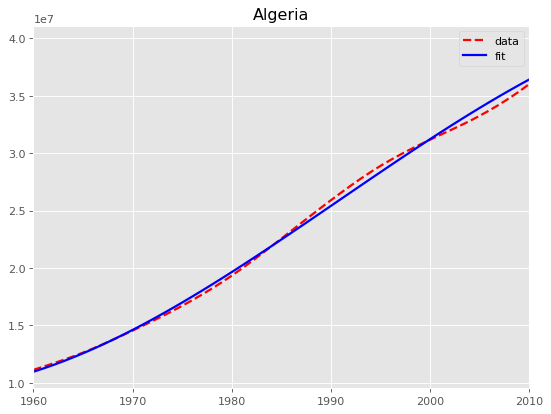

Polinomni fit treceg stepena je  [ 1.06990495e+07  2.51312268e+05  1.06813596e+04 -1.12045701e+02]
Odgovarajući rezidual je  2973430.6202151543


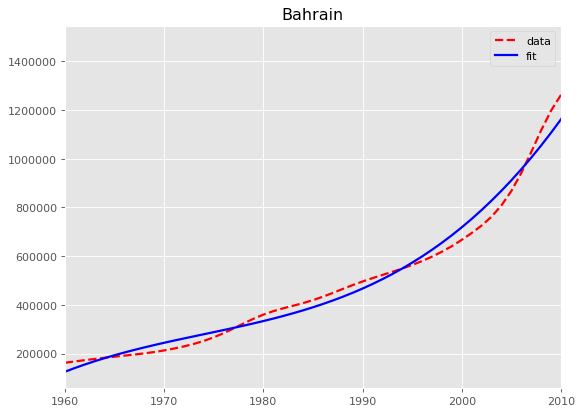

Polinomni fit treceg stepena je  [ 1.09213037e+05  1.68993126e+04 -5.54322007e+02  1.23027344e+01]
Odgovarajući rezidual je  302734.39930973575


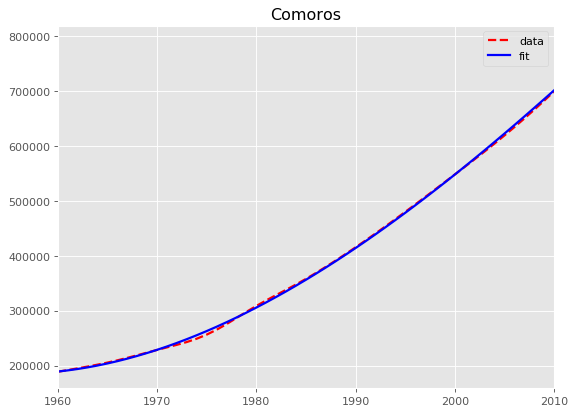

Polinomni fit treceg stepena je  [ 1.87457923e+05  1.45062810e+03  2.19560798e+02 -9.93458357e-01]
Odgovarajući rezidual je  19788.883975170254


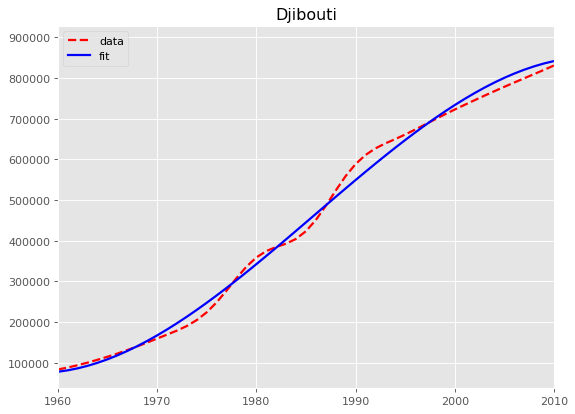

Polinomni fit treceg stepena je  [ 7.59340722e+04  1.43072690e+03  7.25021642e+02 -8.99375798e+00]
Odgovarajući rezidual je  134426.208477428


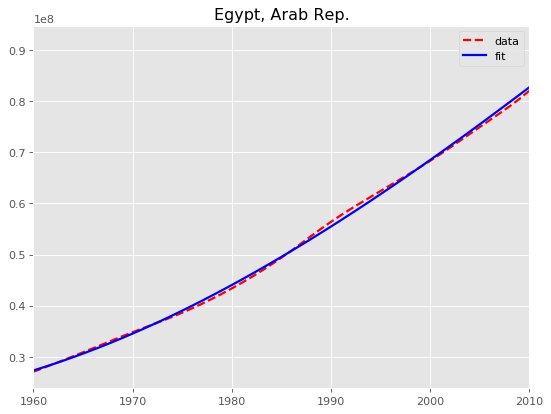

Polinomni fit treceg stepena je  [ 2.67505877e+07  5.66653465e+05  1.34850683e+04 -6.03343188e+01]
Odgovarajući rezidual je  4047882.3237704546


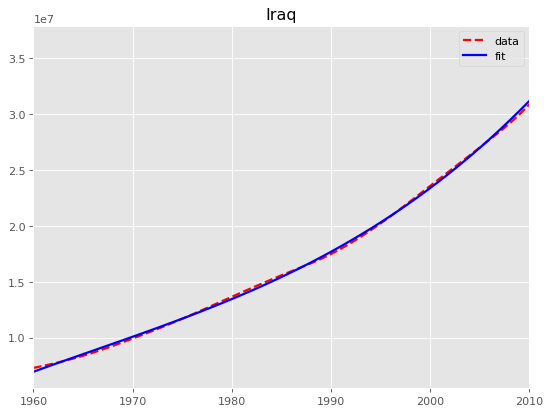

Polinomni fit treceg stepena je  [ 6.62258432e+06  3.25789834e+05 -2.19137806e+03  1.02841816e+02]
Odgovarajući rezidual je  1305547.1004319598


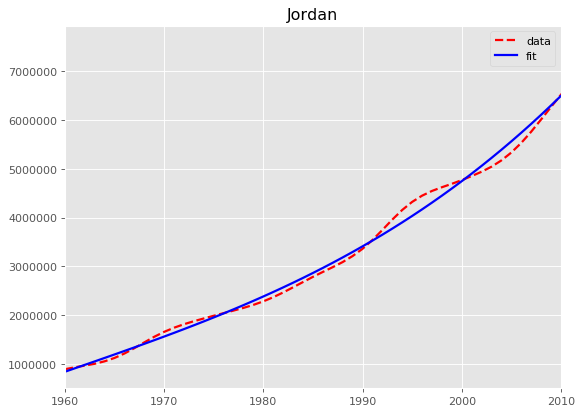

Polinomni fit treceg stepena je  [ 7.66461379e+05  7.06156019e+04 -6.51047191e+01  1.73101262e+01]
Odgovarajući rezidual je  890722.4223529948


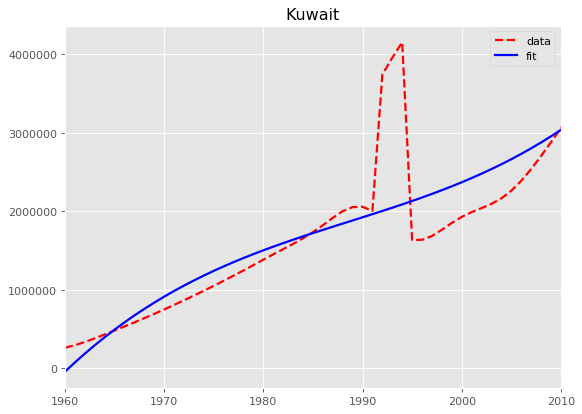

Polinomni fit treceg stepena je  [-1.66433134e+05  1.26147641e+05 -2.90432570e+03  3.26121393e+01]
Odgovarajući rezidual je  3824195.5924813766


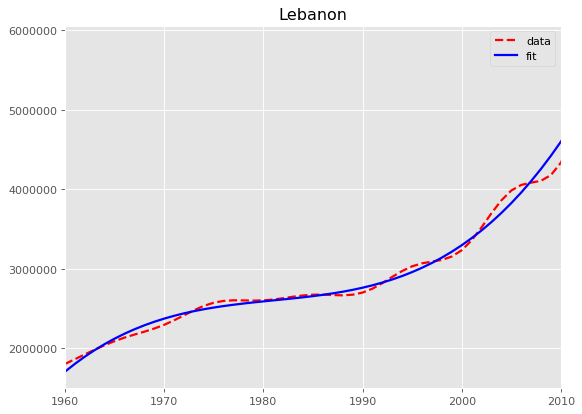

Polinomni fit treceg stepena je  [ 1.60024163e+06  1.11709398e+05 -4.49379069e+03  6.77895771e+01]
Odgovarajući rezidual je  662932.8568900112


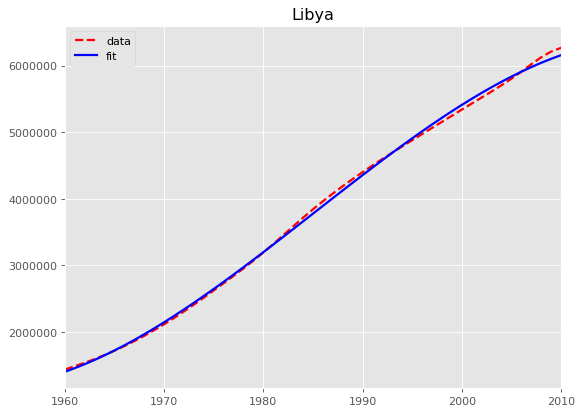

Polinomni fit treceg stepena je  [ 1.35186680e+06  4.67055402e+04  2.67928285e+03 -3.42804308e+01]
Odgovarajući rezidual je  356801.4697464743


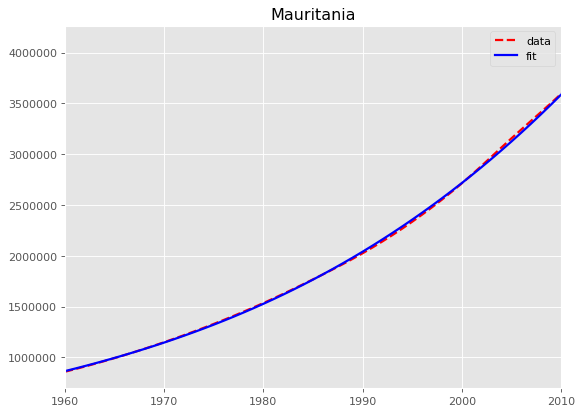

Polinomni fit treceg stepena je  [8.40590815e+05 2.34450885e+04 3.29761672e+02 5.19841207e+00]
Odgovarajući rezidual je  104662.33549599996


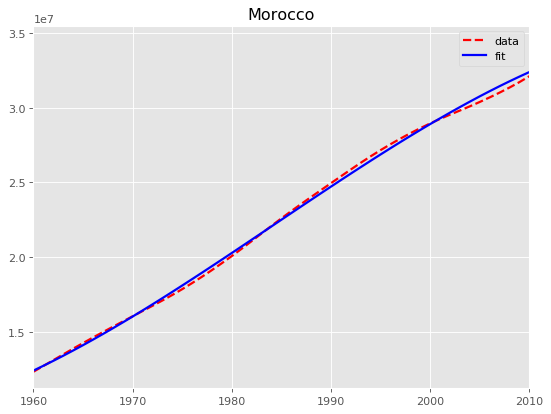

Polinomni fit treceg stepena je  [ 1.20953437e+07  3.04169870e+05  5.62984277e+03 -7.43632166e+01]
Odgovarajući rezidual je  1761214.3714869176


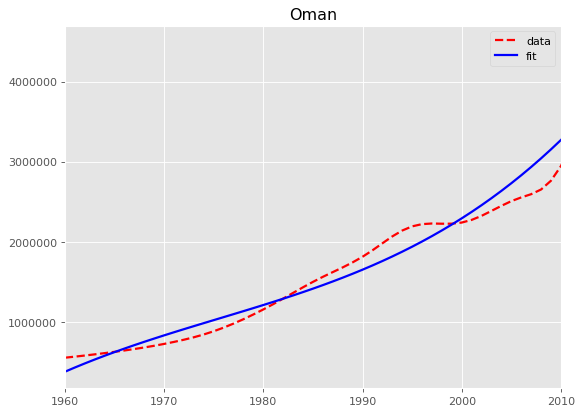

Polinomni fit treceg stepena je  [ 3.21503040e+05  5.59788277e+04 -1.13336421e+03  2.29308130e+01]
Odgovarajući rezidual je  1432532.9717512776


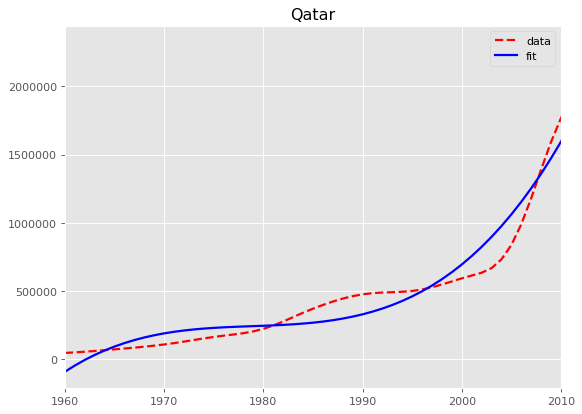

Polinomni fit treceg stepena je  [-1.40706113e+05  5.27129403e+04 -2.51856700e+03  4.21897588e+01]
Odgovarajući rezidual je  804818.4725519869


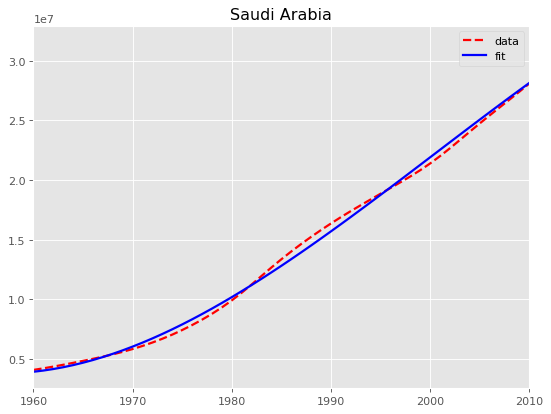

Polinomni fit treceg stepena je  [ 3.85997168e+06  5.90103376e+04  1.38836164e+04 -1.11876848e+02]
Odgovarajući rezidual je  2811062.059000774


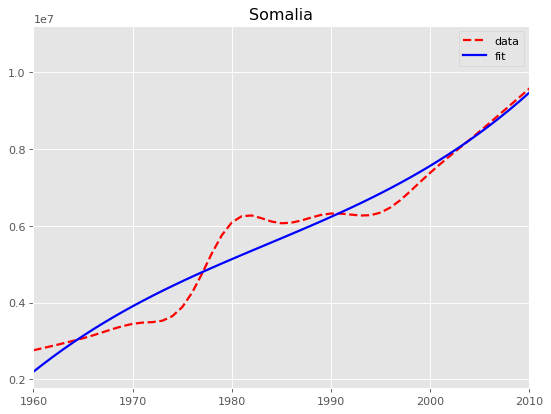

Polinomni fit treceg stepena je  [ 1.98540018e+06  2.14831575e+05 -4.33071750e+03  5.87923599e+01]
Odgovarajući rezidual je  3132504.3861244833


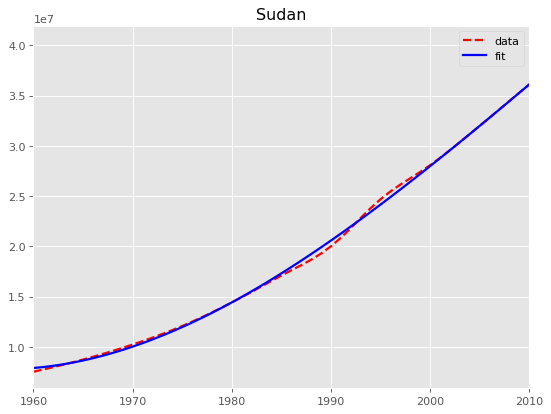

Polinomni fit treceg stepena je  [ 7.83131506e+06  5.35391667e+04  1.42014483e+04 -8.58183595e+01]
Odgovarajući rezidual je  1831589.231910936


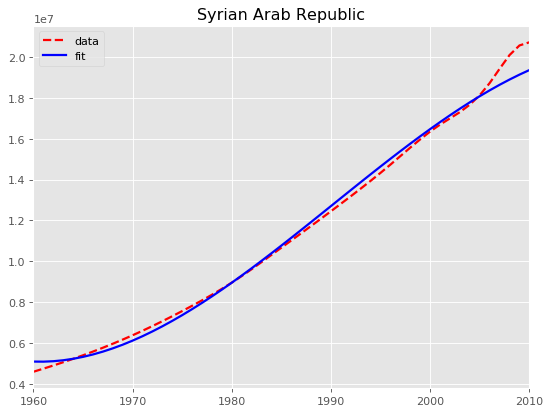

Polinomni fit treceg stepena je  [ 5.12262922e+06 -4.55352399e+04  1.39959919e+04 -1.49582680e+02]
Odgovarajući rezidual je  3726687.26952767


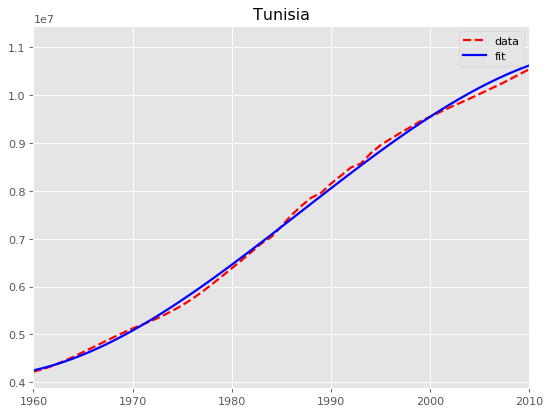

Polinomni fit treceg stepena je  [ 4.20849625e+06  3.65880796e+04  4.48742773e+03 -5.36805562e+01]
Odgovarajući rezidual je  647399.3588028179


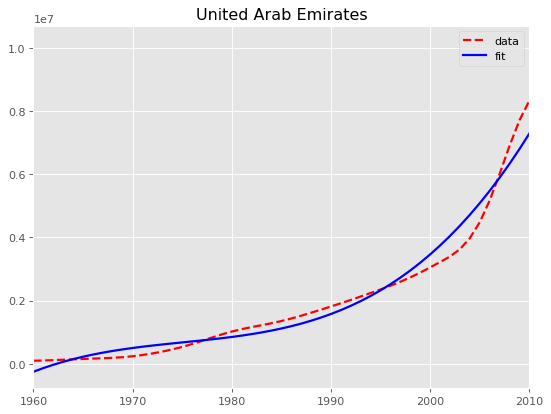

Polinomni fit treceg stepena je  [-3.82835703e+05  1.33724699e+05 -6.31612873e+03  1.30269463e+02]
Odgovarajući rezidual je  2949686.42936291


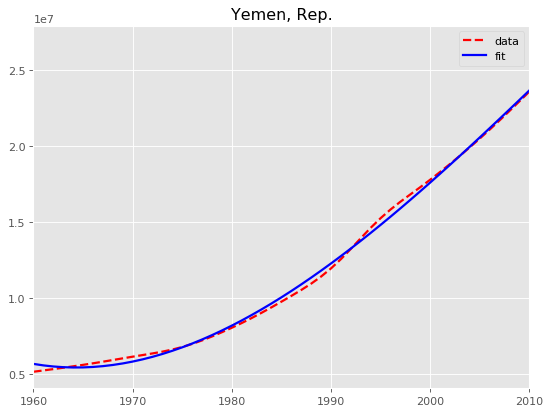

Polinomni fit treceg stepena je  [ 5.80906601e+06 -1.39209945e+05  1.37688006e+04 -8.18051925e+01]
Odgovarajući rezidual je  1771279.2658718477


In [119]:
residuals = []
for i in range(vrednosti.shape[0]):
    x,r = funkcija(i)
    print('Polinomni fit treceg stepena je ', x)
    print('Odgovarajući rezidual je ', r)
    residuals.append(r)

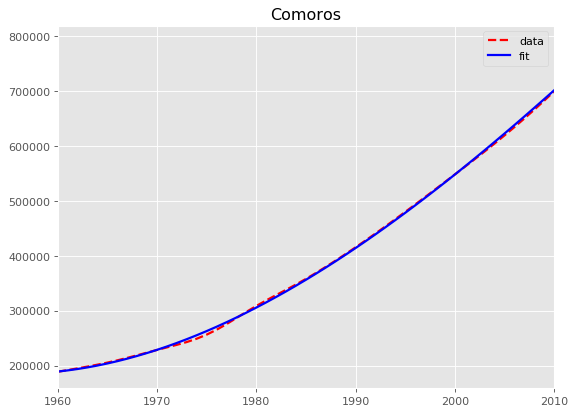

Prema rezidualu najbolja aproksimacija je dobijena za Comoros
i on je 19788.883975170254


In [120]:
funkcija(residuals.index(min(residuals)))
print('Prema rezidualu najbolja aproksimacija je dobijena za', data.iloc[residuals.index(min(residuals)),1])
print('i on je', (min(residuals))) #minimalni rezidual
